In [1]:
import numpy as np
import helpy
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

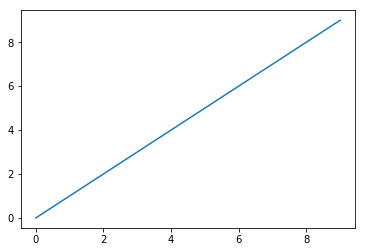

In [3]:
plt.plot(np.arange(10))

In [4]:
prefix = '/Users/zhejun/Document/Result/0804_single_after_10/result'

In [5]:
data = helpy.load_data(prefix)

In [7]:
meta = helpy.load_meta(prefix)

In [9]:
import gear_analysis

In [11]:
reload(gear_analysis)

<module 'gear_analysis' from '/Users/zhejun/Document/Research Code/track/gear_analysis.py'>

In [12]:
gear_analysis.layer_analysis(prefix)

RuntimeError: Cannot do circle_click in interactive/pylab mode

In [13]:
meta = helpy.load_meta(prefix)

In [14]:
boundary = meta.get('boundary')

In [15]:
x0, y0, R = boundary

In [16]:
x0

519.011019761615

In [17]:
y0

511.29339495832573

In [18]:
R

502.36037823194306

In [24]:
data['o'] = (data['o'] + np.pi)%(2 * np.pi)   # flip the detected orientation
tracksets = helpy.load_tracksets(data, run_track_orient=True, run_repair = 'interp')
track_prefix = {prefix: tracksets}
v_data = velocity.compile_noise(track_prefix, width=(0.575,), cat = False, side = 38.0, fps = 2.5, 
                           ring = True, x0= x0, y0 = y0, skip = 1, grad = False)
v_data = v_data[prefix]

In [21]:
import velocity

In [23]:
reload(velocity)

<module 'velocity' from '/Users/zhejun/Document/Research Code/track/velocity.py'>

In [25]:
v_data.keys()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [26]:
fdata = helpy.load_framesets(v_data)

In [27]:
def data_filter(data, x0 , y0 , inner, outer):
    x = data['x']
    y = data['y']
    position = [x - x0, y - y0]
    distance = np.hypot(*position)
    legal = np.where((distance < outer) & (distance > inner))
    return legal

In [30]:

layer_number = 1
sidelength = 38.0

In [52]:
order, vsring, frame, number, difference, vo = (list() for k in range(6))
r_density, ori_distr, order_distr, vpar= (np.empty(0) for k in range(4))
for f, framedata in fdata.iteritems():
    legal = data_filter(framedata, x0, y0, R - 55, R )
    length = len(legal[0])
    number.append(length)
    legal_data = framedata[legal]
    cen_orient = legal_data['corient']
    cor_orient = legal_data['o']
    vorient = legal_data['vo']
    cen_unit_vector = np.array([np.cos(cen_orient), np.sin(cen_orient)]).T
    cor_unit_vector = np.array([np.cos(cor_orient), np.sin(cor_orient)]).T
    ring_orient = - np.cross(cen_unit_vector, cor_unit_vector)
    clockwise = len(np.where(ring_orient > 0)[0])
    counter_clockwise = len(np.where(ring_orient < 0)[0])
    difference.append(clockwise - counter_clockwise)   # n+ - n-
    vring = legal_data['vring']
    frame.append(f)
    order.append(np.mean(ring_orient)/np.sin(np.pi/4))
    vsring.append(np.mean(vring))
    vo.append(np.mean(vorient))
    r_density = np.concatenate((r_density, framedata['r']))
    ori_distr = np.concatenate((ori_distr, legal_data['o'] % (2 * np.pi)))
    order_distr = np.concatenate((order_distr, ring_orient))
    vpar = np.concatenate((vpar, legal_data['vpar']))

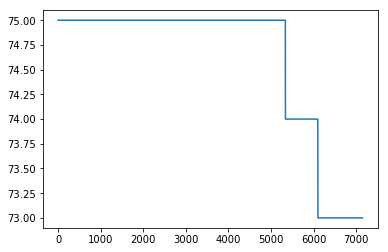

In [51]:
plt.plot(number)

(array([ 1.,  1.,  0., ...,  0.,  0.,  1.]),
 array([ 277.9270401 ,  277.94780571,  277.96857131, ...,  485.54156243,
         485.56232804,  485.58309364]),
 <a list of 10000 Patch objects>)

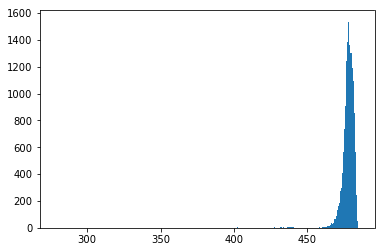

In [55]:
plt.hist(r_density * 38, 10000)

(array([ 1.,  1.,  0., ...,  0.,  0.,  1.]),
 array([  7.31386948,   7.31441594,   7.3149624 , ...,  12.77740954,
         12.777956  ,  12.77850246]),
 <a list of 10000 Patch objects>)

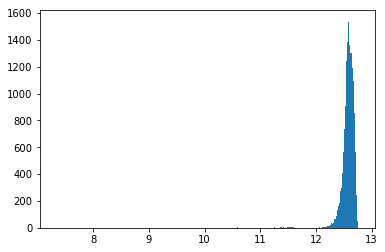

In [56]:
plt.hist(r_density , 10000)

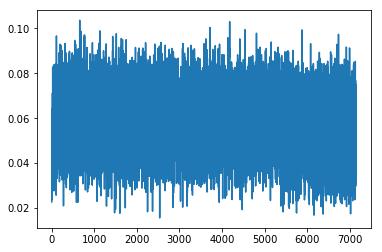

In [70]:
plt.plot(vsring)

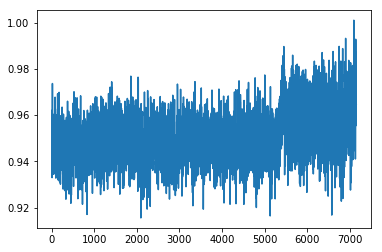

In [71]:
plt.plot(order)

In [72]:
legal74 = np.where(number == 74)

In [73]:
legal75 = np.where(number == 75)

In [74]:
legal73 = np.where(number == 73)

In [75]:
len(legal74[0])

763

In [76]:
len(legal75[0])

5338

In [77]:
len(legal73[0])

1051

In [78]:
len(fdata.keys())

7152

In [79]:
763 + 5338 + 1051

7152

In [81]:
vsring = np.array(vsring)

In [82]:
vsring[legal74].std()

0.016009139

In [83]:
vsring[legal75].std()

0.01539878

In [84]:
vsring[legal73].std()

0.016220205

In [85]:
vsring[legal74].mean()

0.055692188

In [86]:
vsring[legal75].mean()

0.060018893

In [87]:
vsring[legal73].mean()

0.053398464